In [39]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

data = pd.read_excel("/content/drive/My Drive/Data_Train.xlsx")

In [42]:
data.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.2+ KB


In [44]:
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [0]:
# checking the uniques before substituting and type casting
data["Average_Cost"]=data["Average_Cost"].str.replace(",","")

In [0]:
# Extracting the numerical content out and filling the null values using ffill method and then type casting it to Integer
data["Average_Cost"]=data["Average_Cost"].str.extract("(\d{1,4})").fillna("0").astype(int)

In [47]:
# Checking the uniques in "Average_Cost" after type casting
data["Average_Cost"].unique()

array([ 200,  100,  150,  250,  650,  350,  800,   50,  400,  600,  300,
        750,  450,  550, 1000,  500,  900, 1200,  950,  850,  700, 1150,
          0, 1100, 1400, 2050])

In [0]:
# Extracting the numerical content out and filling the null values using ffill method and then type casting it to Integer
data["Minimum_Order"]=data["Minimum_Order"].str.extract("(\d{1,4})").fillna("0").astype(int)

In [49]:
# checking the uniques in Minimum_Order
data["Minimum_Order"].unique()

array([ 50,  99,   0, 200, 450, 350,  79, 400, 199, 500, 250, 150,  90,
       299, 300, 240,  89,  59])

In [50]:
# checking the uniques in "Ratings"
data["Rating"].unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

In [51]:
# checking the values count in Ratings
# the highest is 10% of the total data that has the following speacial characters

print(data[data["Rating"]=="-"]["Rating"].value_counts()/len(data)*100)
print(data[data["Rating"]=="NEW"]["Rating"].value_counts()/len(data)*100)
print(data[data["Rating"]=="Temporarily Closed"]["Rating"].value_counts()/len(data)*100)
print(data[data["Rating"]=="Opening Soon"]["Rating"].value_counts()/len(data)*100)

-    10.735533
Name: Rating, dtype: float64
NEW    6.832522
Name: Rating, dtype: float64
Temporarily Closed    0.018028
Name: Rating, dtype: float64
Opening Soon    0.108167
Name: Rating, dtype: float64


In [0]:
# replacing the special values with Nan values
ls=['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2','2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1','2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5','2.2', '4.9', '2.3', '2.1']
data["Rating"].where(data["Rating"].isin(ls),np.nan,inplace=True)
data["Rating"]=data["Rating"].fillna("0").astype(float)

In [53]:
# checking the unique in "Rating" 
data["Rating"].unique()

array([3.5, 3.6, 3.7, 3.2, 3.8, 4. , 3.9, 4.2, 0. , 2.8, 3. , 3.3, 3.1,
       4.7, 3.4, 4.1, 2.9, 4.6, 4.3, 2.6, 4.5, 4.4, 4.8, 2.4, 2.7, 2.5,
       2.2, 4.9, 2.3, 2.1])

In [54]:
data["Votes"].unique()

array(['12', '11', '99', ..., '290', '698', '3700'], dtype=object)

In [55]:
# extracting the numerical values and substituting the special chars by NaN.
# Then changing it to float type.
data["Votes"]=data["Votes"].str.extract("(\d{1,5})").fillna(0).astype(float)
data["Votes"].unique()

array([  12.,   11.,   99., ...,  290.,  698., 3700.])

In [56]:
data["Votes"].dtype

dtype('float64')

In [57]:
# checking the null values in "Votes"
data["Votes"].isnull().sum()

0

In [58]:
#checking the uniques in Reviews
data["Reviews"].unique()

array(['4', '30', '95', '235', '18', '31', '1235', '26', '294', '61',
       '1239', '-', '128', '5', '53', '47', '46', '23', '160', '2', '1',
       '38', '9', '19', '7', '132', '74', '13', '111', '499', '29', '34',
       '851', '513', '22', '27', '32', '25', '37', '8', '35', '6', '173',
       '36', '15', '174', '11', '59', '16', '89', '170', '10', '1660',
       '71', '41', '20', '40', '3', '191', '105', '100', '106', '21',
       '65', '69', '2547', '159', '110', '42', '181', '109', '179', '490',
       '28', '343', '118', '690', '72', '296', '33', '164', '50', '129',
       '1581', '234', '45', '2363', '24', '115', '12', '138', '175', '39',
       '66', '1603', '1443', '390', '108', '1457', '112', '107', '259',
       '269', '52', '196', '794', '589', '48', '145', '536', '247', '17',
       '49', '245', '87', '83', '54', '453', '318', '99', '205', '165',
       '1845', '766', '114', '44', '51', '104', '478', '70', '232', '435',
       '14', '659', '554', '399', '77', '88', '503',

In [59]:
# checking the percentage of spcl char in Reviews
data[data["Reviews"]== "-"]["Reviews"].value_counts()/len(data)*100

-    20.840094
Name: Reviews, dtype: float64

In [0]:
# substituting the special chars with null and then imputing the null values in "Reviews" .
data["Reviews"]=data["Reviews"].replace("-",np.nan).fillna("0").astype(int)

In [0]:
# replacing the minutes in the "Delivery_time" with just the numerical and the type casting the whole column.
#data["Delivery_Time"]=data["Delivery_Time"].str.replace(" minutes","").str.strip().astype(int)

In [62]:
# target variable distribution throughout the dataset
data["Delivery_Time"].value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

In [63]:
data.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12.0,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11.0,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99.0,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176.0,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521.0,235,65 minutes


In [64]:
# checking the info after 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null int64
Minimum_Order    11094 non-null int64
Rating           11094 non-null float64
Votes            11094 non-null float64
Reviews          11094 non-null int64
Delivery_Time    11094 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 780.2+ KB


In [0]:
data["Location"] = data["Location"].str.split(",").str[-1].str.strip()

In [66]:
# substituting the categorical values with its count i Location column
loc_series =data.Location.value_counts()
data["Location"]= data["Location"].map(loc_series)
data["Location"]

0        1358
1         366
2         459
3        2086
4         457
         ... 
11089      22
11090    2086
11091     334
11092     366
11093     260
Name: Location, Length: 11094, dtype: int64

In [0]:
# label encoding the numerically converted Location
#from sklearn.preprocessing import LabelEncoder
#le= LabelEncoder()
#data["Location"]= le.fit_transform(data["Location"])

In [0]:
rating = data.pivot_table(index = "Restaurant",values = "Rating")
maped =pd.Series(rating["Rating"],index=rating.index)
data["Restaurant"]=data["Restaurant"].map(maped)

In [0]:
# Restaurant LE
#data["Restaurant"]=le.fit_transform(data["Restaurant"])

In [0]:
#data= pd.get_dummies(data,columns=["Cuisines"],drop_first=True)

In [0]:
#data = data.drop(data[["Delivery_Time"]],axis=1)

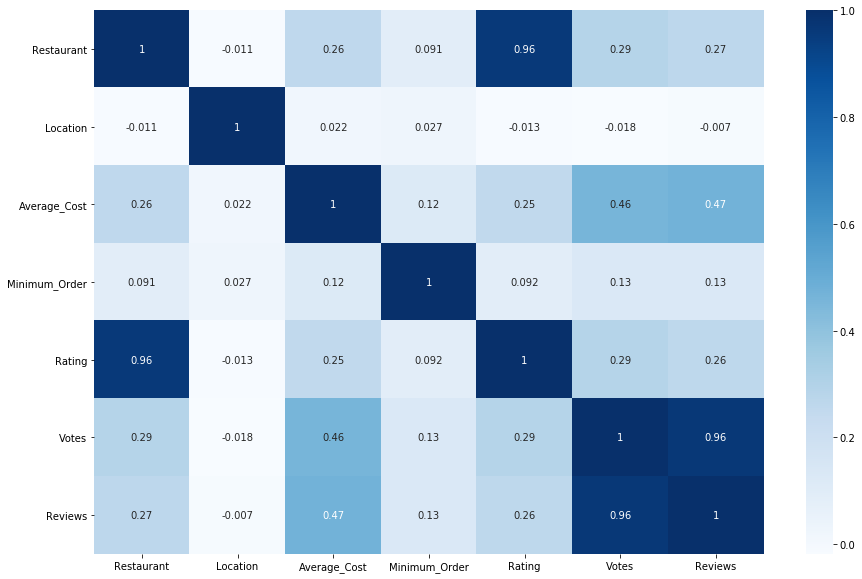

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

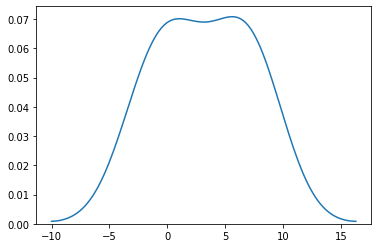

In [73]:
# Checking the skewness of the data
import seaborn as sns
sns.distplot(data.skew(),hist=False)

# Imbalance data
  - We can see it is highly imbalnce data
  - As the numbers of some classes are very high as compared to other classes.
  - Thus we will use sampling technique in order to bring the classes count to same level.
  - We will use SMOTE technique of over smapling the data.
  - We will over sample all the other minority classes and try to bring it to majority class level.


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

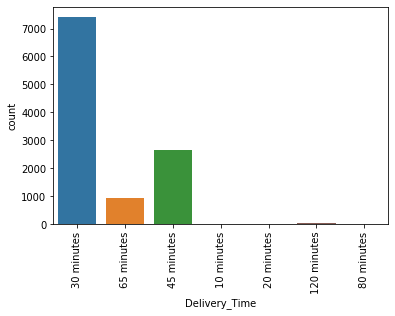

In [74]:
# Visualising the count of classes in the output variable
import seaborn as sns
sns.countplot(data.Delivery_Time)
plt.xticks(rotation=90)

In [0]:
iv = data[["Location",'Average_Cost','Minimum_Order',
       'Votes', 'Reviews',"Rating"]]
dv = data.iloc[:,-1]

#log transformed values
log_iv = data[["Location",'Restaurant','Average_Cost', 'Minimum_Order',
       'Votes', 'Reviews',"Rating"]].apply(lambda x : np.log(x+1))

# over sampling the minority classes in the over all data
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="not majority" ,k_neighbors=3)
x_sm,Y_sm = smote.fit_sample(iv,dv)

from sklearn.model_selection import train_test_split
# Splitted log transformed data
trainxl,testxl,trainyl,testyl = train_test_split(log_iv,dv,test_size =0.1,random_state = 42)

# Over sampling the minority classes only of the training data
from imblearn.over_sampling import SMOTE
smote1 = SMOTE(sampling_strategy="not majority" ,k_neighbors=3)
x_sm1,Y_sm1 = smote1.fit_sample(trainxl,trainyl)

In [0]:
# Importing classifiers , evaluation metrics and splitting the data

from sklearn.ensemble import AdaBoostClassifier ,GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score
from xgboost import XGBClassifier



#Splitted original data
trainx,testx,trainy,testy = train_test_split(iv,dv,test_size = 0.2 )

# Splitted over sampled data
trainxs,testxs,trainys,testys = train_test_split(x_sm,Y_sm,test_size = 0.2)

In [80]:
#Randomforest on fully over sampled data
rf=RandomForestClassifier(n_estimators =500, max_depth = 32)
rf.fit(trainxs,trainys)
predrf= rf.predict(testxs)
print(confusion_matrix(testys,predrf))
print(accuracy_score(testys,predrf))

[[1479    0    0    0    0    0    0]
 [   0 1485    0    4    1    1    0]
 [   0    0 1450    3    0    0    0]
 [   0   10    1 1261  158   49    0]
 [   0    6    4  148 1206   76    0]
 [   0   10    3   38   57 1371    1]
 [   0    0    0    0    2    0 1545]]
0.9448355675571415


In [89]:
#XGB on fully oversampled data
xgb=XGBClassifier(n_estimators =300, max_depth = 8,learning_rate=0.257)
xgb.fit(trainxs,trainys)
predxgb= xgb.predict(testxs)
print(confusion_matrix(testys,predxgb))
print(accuracy_score(testys,predxgb))

[[1479    0    0    0    0    0    0]
 [   0 1480    3    6    1    1    0]
 [   0    0 1451    2    0    0    0]
 [   0    7    2 1311  121   38    0]
 [   0    7    3  181 1146  103    0]
 [   0    9    2   46   89 1331    3]
 [   0    1    0    0    1    0 1545]]
0.9396277365223261


In [82]:
# Performing k fold cross validation for for random Forest classifier
from sklearn.model_selection import cross_val_score
cm =cross_val_score(rf,x_sm,Y_sm,scoring="accuracy",cv=4)
cm.mean()

0.9427128314106255

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
# Parameter tunning for random forest classifier
params = {"n_estimators":[10,50,100,200,300,500],"max_depth":[4,8,16,32,64]}

rs = RandomizedSearchCV(rf,param_distributions=params,scoring="accuracy",cv = 4)
rs.fit(iv,dv)
rs.best_params_

{'max_depth': 32, 'n_estimators': 500}

In [88]:
# Parameter tunning for XGBOOST classifier
params = {"n_estimators":[100,200,300,500],"max_depth":[4,8,16,32,64], "learning_rate":[0.257,0.5,0.75,0.8,0.875,0.95]}

rsx = RandomizedSearchCV(xgb,param_distributions=params,scoring="accuracy",cv = 4)
rsx.fit(iv,dv)
rsx.best_params_

{'learning_rate': 0.257, 'max_depth': 8, 'n_estimators': 300}

Loading Test.csv Dataset

In [0]:
testdata = pd.read_excel("/content/drive/My Drive/Data_Test.xlsx")

In [91]:
# checking the uniques before substituting and type casting
testdata["Average_Cost"]=testdata["Average_Cost"].str.replace(",","")

# Extracting the numerical content out and filling the null values using ffill method and then type casting it to Integer
testdata["Average_Cost"]=testdata["Average_Cost"].str.extract("(\d{1,4})").fillna("0").astype(int)

# Checking the uniques in "Average_Cost" after type casting
testdata["Average_Cost"].unique()


# Extracting the numerical content out and filling the null values using ffill method and then type casting it to Integer
testdata["Minimum_Order"]=testdata["Minimum_Order"].str.extract("(\d{1,4})").fillna("0").astype(int)

# checking the uniques in Minimum_Order
testdata["Minimum_Order"].unique()

# checking the uniques in "Ratings"
testdata["Rating"].unique()

print(testdata[testdata["Rating"]=="-"]["Rating"].value_counts()/len(data)*100)
print(testdata[testdata["Rating"]=="NEW"]["Rating"].value_counts()/len(data)*100)
print(testdata[testdata["Rating"]=="Temporarily Closed"]["Rating"].value_counts()/len(data)*100)
print(testdata[testdata["Rating"]=="Opening Soon"]["Rating"].value_counts()/len(data)*100)

# uniques in rating befor imputation
data["Rating"].unique()

# replacing the special values with Nan values
lss=['4.2', '3.6', '2.9', '3.4', '3.3', '3.8', '3.2', '3.1',
       '4.1', '3.9','3.7', '4.0', '4.3', '3.0', '3.5', '2.6', '2.8',
       '4.5', '2.7', '4.4', '2.1', '2.4', '4.7', '4.6', '2.5', '4.8',
       '2.3']
testdata["Rating"].where(testdata["Rating"].isin(lss),np.nan,inplace=True)
testdata["Rating"]=testdata["Rating"].fillna("0").astype(float)

# checking the unique in "Rating" 
testdata["Rating"].unique()

testdata["Votes"].unique()

# extracting the numerical values and substituting the special chars by NaN.
# Then changing it to float type.
testdata["Votes"]=testdata["Votes"].str.extract("(\d{1,5})").astype(float)
testdata["Votes"].unique()

# Imputing the nan values using Interpolate
testdata["Votes"]=testdata["Votes"].fillna("0").astype(float)

# checking the null values in "Votes"
testdata["Votes"].isnull().sum()
# checking the percentage of spcl char in Reviews
testdata[testdata["Reviews"]== "-"]["Reviews"].value_counts()/len(testdata)*100

# substituting the special chars with null and then imputing the null values in "Reviews" .
testdata["Reviews"]=testdata["Reviews"].replace("-",np.nan).fillna("0").astype(int)

# checking the info after 
testdata.info()
testdata["Location"] = testdata["Location"].str.split(",").str[-1].str.strip()

# substituting the categorical values with its count in Location column
loc_seriess =testdata.Location.value_counts()
testdata["Location"]= testdata["Location"].map(loc_seriess)
testdata["Location"]

# substituting the Restaurants names with its mean rating
ratings = testdata.pivot_table(index = "Restaurant",values = "Rating")
mapeds =pd.Series(ratings["Rating"],index=rating.index)
testdata["Restaurant"]=testdata["Restaurant"].map(mapeds)

# Using XGBOOST classifier in order to classify the food delivery timings
xgbt = XGBClassifier(n_estimators=500,max_depth=64,learning_rate=0.257)
xgbt.fit(x_sm,Y_sm)


# predicting the output
ivtest = testdata[['Restaurant','Average_Cost', 'Minimum_Order',
       'Votes', 'Reviews',"Rating"]].values
predxgbt= xgbt.predict(ivtest)
print(predxgbt)

-    2.749234
Name: Rating, dtype: float64
NEW    1.802776
Name: Rating, dtype: float64
Series([], Name: Rating, dtype: float64)
Opening Soon    0.018028
Name: Rating, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 8 columns):
Restaurant       2774 non-null object
Location         2774 non-null object
Cuisines         2774 non-null object
Average_Cost     2774 non-null int64
Minimum_Order    2774 non-null int64
Rating           2774 non-null float64
Votes            2774 non-null float64
Reviews          2774 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 173.5+ KB
['30 minutes' '45 minutes' '30 minutes' ... '45 minutes' '120 minutes'
 '45 minutes']


In [93]:
# Storing the predicted output in the data frame with column name "Deliver_Time"

finaldf = pd.DataFrame({"Delivery_Time":predxgbt})
finaldf

,Delivery_Time
0,30 minutes
1,45 minutes
2,30 minutes
3,30 minutes
4,45 minutes
...,...
2769,45 minutes
2770,30 minutes
2771,45 minutes
2772,120 minutes


In [0]:
# Writing the output to an excel file
writer=pd.ExcelWriter("debjeetdas_submission_file.xlsx")
finaldf.to_excel(writer,index=False)
writer.save()